### Essentials

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Data

In [2]:
data = [
    {"item_name": "Milk", "quantity": 2, "days": 5},  # Milk with slightly shorter life due to larger quantity
    {"item_name": "Bread", "quantity": 2, "days": 2},  # Bread with shorter life due to larger quantity
    {"item_name": "Eggs", "quantity": 6, "days": 14},    # Eggs with slightly shorter life due to smaller quantity

    {"item_name": "Milk", "quantity": 0.5, "days": 10}, # Milk with longer life due to smaller quantity
    {"item_name": "Bread", "quantity": 0.5, "days": 4},  # Bread with longer life due to smaller quantity
    {"item_name": "Eggs", "quantity": 18, "days": 28},   # Eggs with longer life due to larger quantity

    {"item_name": "Milk", "quantity": 1.5, "days": 6},  # Milk with intermediate life
    {"item_name": "Bread", "quantity": 1.5, "days": 2.5}, # Bread with intermediate life
    {"item_name": "Eggs", "quantity": 9, "days": 18},     # Eggs with intermediate life
    
    {"item_name": "Milk", "quantity": 3, "days": 4},   # Milk with shorter life due to larger quantity
]

### Split data into features (quantity) and target (days)

In [4]:
X = [[d["quantity"]] for d in data]
y = [d["days"] for d in data]

### Training the Model

In [5]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:
def predict_days(item_name, quantity):
    # Convert quantity to a 2D array for prediction
    X_new = [[quantity]]
    predicted_days = int(max(model.predict(X_new)[0], 1))  # Ensure prediction >= 1 and convert to integer
    return max(predicted_days, 1)  # Ensure prediction >= 1

### Generate data for plotting the regression line

In [14]:
quantity_range = range(1, 21)  # Adjust range as needed
predicted_days = [model.predict([[q]])[0] for q in quantity_range]

### Plot the data and regression line

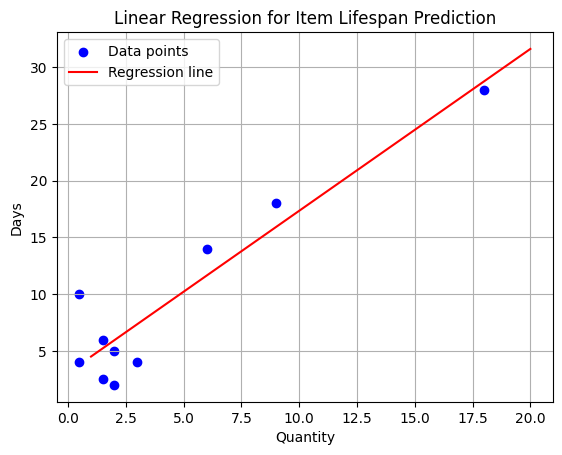

In [15]:
plt.scatter([d["quantity"] for d in data], y, color="blue", label="Data points")
plt.plot(quantity_range, predicted_days, color="red", label="Regression line")
plt.xlabel("Quantity")
plt.ylabel("Days")
plt.title("Linear Regression for Item Lifespan Prediction")
plt.legend()
plt.grid(True)
plt.show()

### User Interaction

In [16]:
while True:
    user_item_name = input("Enter item name (or 'quit' to exit): ")
    if user_item_name.lower() == "quit":
        break
    try:
        user_quantity = float(input("Enter quantity: "))
        predicted_days = predict_days(user_item_name, user_quantity)
        print(f"{user_item_name} with quantity {user_quantity} will last approximately {predicted_days} days.")
    except ValueError:
        print("Invalid quantity. Please enter a number.")

print("Exiting...")

Milk with quantity 2.0 will last approximately 5 days.
Eggs with quantity 10.0 will last approximately 17 days.
Exiting...
